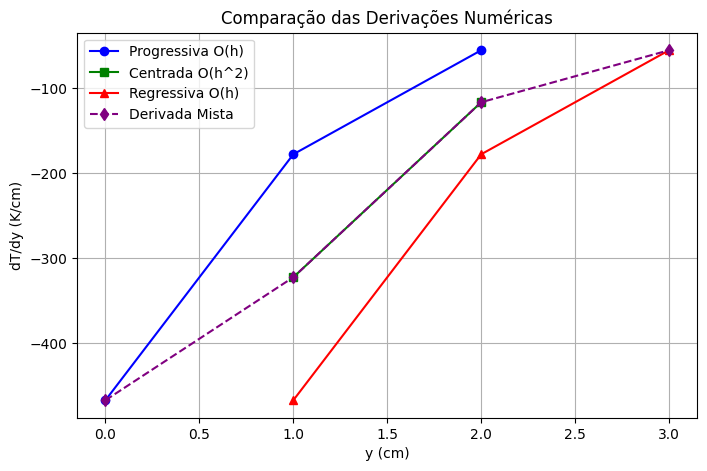

Derivadas calculadas:
Progressiva O(h): [-466.66999999999996, -177.77000000000004, -55.56]
Centrada O(h^2): [-322.22, -116.66500000000002]
Regressiva O(h): [-466.66999999999996, -177.77000000000004, -55.56]
Derivada Mista: [-466.67  -322.22  -116.665  -55.56 ]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

y = np.array([0, 1, 2, 3])  
T = np.array([1000, 533.33, 355.56, 300])  
h = y[1] - y[0] 


DerivadaProgressiva = [(T[i+1] - T[i]) / h for i in range(len(T) - 1)]
DerivadaCentrada = [(T[i+1] - T[i-1]) / (2 * h) for i in range(1, len(T) - 1)]
DerivadaRegressiva = [(T[i] - T[i-1]) / h for i in range(1, len(T))]

DerivadaMista = np.zeros(len(T))
DerivadaMista[0] = DerivadaProgressiva[0]  
for i in range(1, len(T) - 1):
    DerivadaMista[i] = (T[i+1] - T[i-1]) / (2 * h)  
DerivadaMista[-1] = DerivadaRegressiva[-1]  

y_forward = y[:-1]
y_central = y[1:-1]
y_backward = y[1:]
y_mista = y

plt.figure(figsize=(8, 5))
plt.plot(y_forward, DerivadaProgressiva, marker='o', linestyle='-', color='blue', label='Progressiva O(h)')
plt.plot(y_central, DerivadaCentrada, marker='s', linestyle='-', color='green', label='Centrada O(h^2)')
plt.plot(y_backward, DerivadaRegressiva, marker='^', linestyle='-', color='red', label='Regressiva O(h)')
plt.plot(y_mista, DerivadaMista, marker='d', linestyle='--', color='purple', label='Derivada Mista')
plt.xlabel("y (cm)")
plt.ylabel("dT/dy (K/cm)")
plt.title("Comparação das Derivações Numéricas")
plt.legend()
plt.grid()
plt.show()


print("Derivadas calculadas:")
print(f"Progressiva O(h): {DerivadaProgressiva}")
print(f"Centrada O(h^2): {DerivadaCentrada}")
print(f"Regressiva O(h): {DerivadaRegressiva}")
print(f"Derivada Mista: {DerivadaMista}")


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Dados
y = np.array([0, 1, 2, 3])  
T = np.array([1000, 533.33, 355.56, 300])  
h = y[1] - y[0] 

# Cálculo das derivadas
DerivadaProgressiva = [(T[i+1] - T[i]) / h for i in range(len(T) - 1)]
DerivadaCentrada = [(T[i+1] - T[i-1]) / (2 * h) for i in range(1, len(T) - 1)]
DerivadaRegressiva = [(T[i] - T[i-1]) / h for i in range(1, len(T))]

DerivadaMista = np.zeros(len(T))
DerivadaMista[0] = DerivadaProgressiva[0]  
for i in range(1, len(T) - 1):
    DerivadaMista[i] = (T[i+1] - T[i-1]) / (2 * h)  
DerivadaMista[-1] = DerivadaRegressiva[-1]  

# Interpolação para suavização
interp_y = np.linspace(y[0], y[-1], 100)  # Novos pontos para suavização
interp_progressiva = interp1d(y[:-1], DerivadaProgressiva, kind='cubic', fill_value="extrapolate")
interp_centrada = interp1d(y[1:-1], DerivadaCentrada, kind='cubic', fill_value="extrapolate")
interp_regressiva = interp1d(y[1:], DerivadaRegressiva, kind='cubic', fill_value="extrapolate")
interp_mista = interp1d(y, DerivadaMista, kind='cubic', fill_value="extrapolate")

# Plotagem
plt.figure(figsize=(8, 5))
plt.plot(interp_y, interp_progressiva(interp_y), linestyle='-', color='blue', label='Progressiva O(h)')
plt.plot(interp_y, interp_centrada(interp_y), linestyle='-', color='green', label='Centrada O(h^2)')
plt.plot(interp_y, interp_regressiva(interp_y), linestyle='-', color='red', label='Regressiva O(h)')
plt.plot(interp_y, interp_mista(interp_y), linestyle='--', color='purple', label='Derivada Mista')
plt.xlabel("y (cm)")
plt.ylabel("dT/dy (K/cm)")
plt.title("Comparação das Derivações Numéricas (Interpoladas)")
plt.legend()
plt.grid()
plt.show()

# Exibição dos valores
print("Derivadas calculadas:")
print(f"Progressiva O(h): {DerivadaProgressiva}")
print(f"Centrada O(h^2): {DerivadaCentrada}")
print(f"Regressiva O(h): {DerivadaRegressiva}")
print(f"Derivada Mista: {DerivadaMista}")


ValueError: The number of derivatives at boundaries does not match: expected 1, got 0+0